In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
from builtins import *

In [8]:
from bokeh.command.bootstrap import main

In [18]:
%matplotlib inline
#%matplotlib qt
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(15, 15))
import seaborn as sns
import finamquote_dwl as fn
import pandas as pd
import numpy as np
from ipywidgets import Text, IntSlider, interact
from IPython.display import display
from datetime import datetime, timedelta, date
from math import floor
from bokeh.plotting import figure, show, output_server, curdoc, vplot
from bokeh.io import output_notebook
from bokeh.client import push_session
from bokeh.models import Slider
import bokeh
import time
import point_and_figure
output_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

In [6]:
p = figure(width=400, height=400)
# p.annulus(x=[1, 2, 3], y=[1, 2, 3], inner_radius=0.1, outer_radius=0.25,
#           color="orange", alpha=0.6)
p.circle(x=[1, 2, 3], y=[1, 2, 3], fill_color="white", alpha=0.5, size=100)
#ticker = bokeh.models.SingleIntervalTicker()
ticker = bokeh.models.FixedTicker()
ticker.ticks = [1, 2, 3]
# ticker.interval = 1
#p.xaxis.ticker = ticker
#p.xgrid.ticker = ticker
show(p)

In [10]:
#quote = fn.get_quotes_finam('SPFB.RTS', start_date='20160401', period='5min', verbose=False)
last_day = quote_base.ix[-1].name
last_day_begin = date(last_day.year, last_day.month, last_day.day)
quote_base = quote.ix[:last_day_begin]
last_day_str = last_day_begin.strftime('%Y%m%d')
text = Text()
display(text)
while True:
    quote = fn.get_quotes_finam('SPFB.RTS', start_date=last_day_str, period='15min', verbose=False)
    quote = quote_base.append(quote)
    time_str = quote.ix[-1].name.strftime('%Y%m%d %H:%M')
    text.value = '{} {}'.format(time_str, quote.ix[-1]['SPFB.RTS_Close'])
    time.sleep(1)

NameError: name 'quote_base' is not defined

[5, -3, 4]


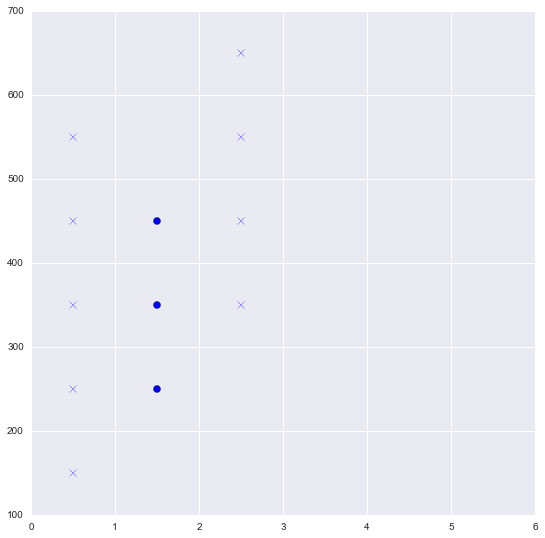

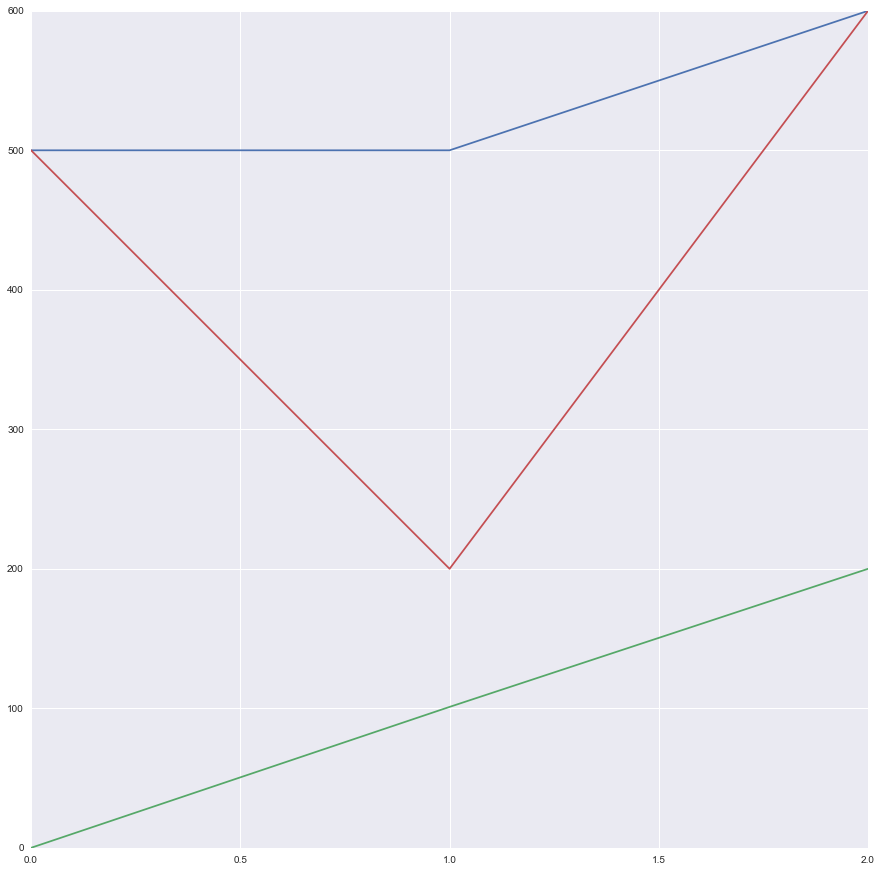

In [24]:
pf = point_and_figure.Point_and_Figure()
pf.box_size = 100
data_slice = slice(-50, None)
H = np.asarray([500,500,600])
L = np.asarray([0,101,200])
C = np.asarray([500,300,600])
O = np.asarray([0,200,200])
pf.process(O, H, L,C)
print(pf.boxes)
#pf.prepare_datasource()
pf.draw_bokeh()
pf.draw()
plt.show()
plt.plot(H)
plt.plot(L)
plt.plot(pf.levels)


[-3, 3, -8, 6, -5, 6]


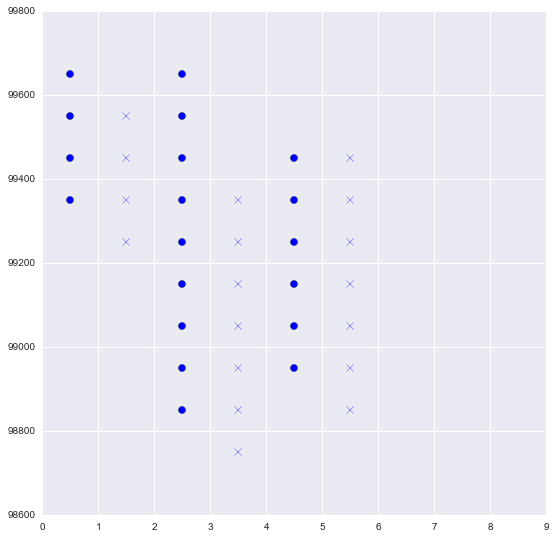

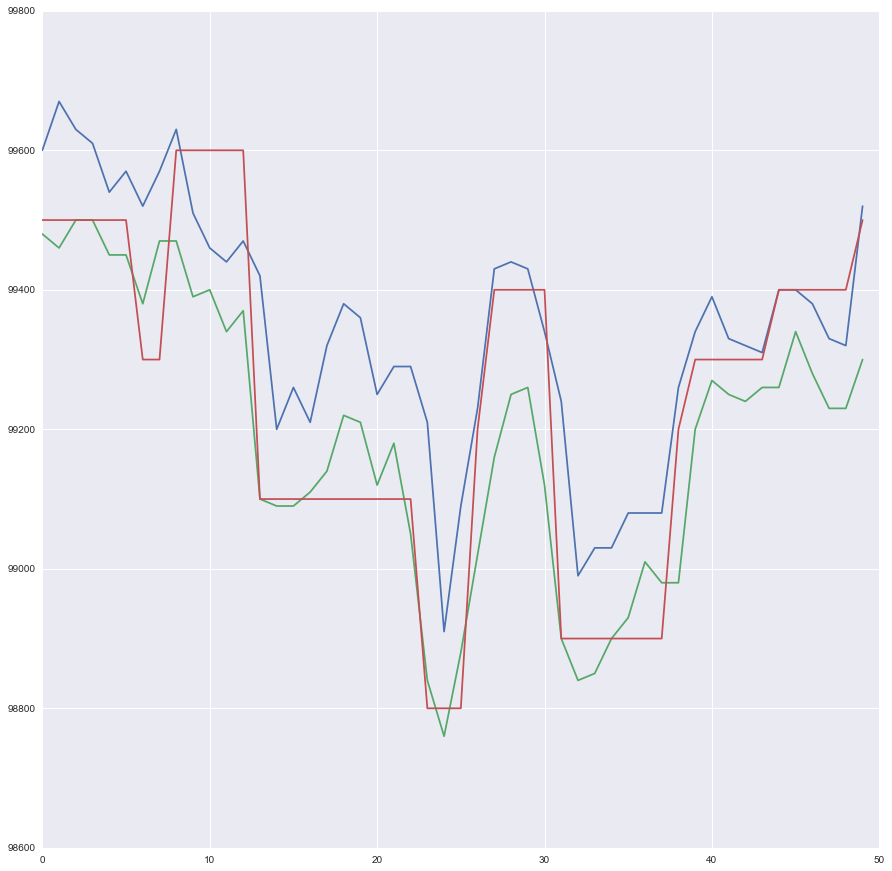

In [2]:
quote = fn.get_quotes_finam('SPFB.RTS', start_date='20160301', period='15min', verbose=False)
# quote2 = fn.get_quotes_finam('SPFB.RTS', start_date='20160101', period='15min', verbose=False)
# quote3 = fn.get_quotes_finam('SPFB.RTS', start_date='20160101', period='hour', verbose=False)
pf = point_and_figure.Point_and_Figure()
pf.box_size = 100
data_slice = slice(-50, None)
H = quote['SPFB.RTS_High'][data_slice].values
L = quote['SPFB.RTS_Low'][data_slice].values
C = quote['SPFB.RTS_Close'][data_slice].values
O = quote['SPFB.RTS_Open'][data_slice].values
pf.process(O, H, L,C)
print(pf.boxes)
#pf.prepare_datasource()
pf.draw_bokeh()
pf.draw()
plt.show()
#quote1['SPFB.RTS_High'][data_slice].plot()
#quote1['SPFB.RTS_Low'][data_slice].plot()

# pf.box_size = 500
# H = quote2['SPFB.RTS_High'][data_slice].values
# L = quote2['SPFB.RTS_Low'][data_slice].values
# C = quote2['SPFB.RTS_Close'][data_slice].values
# O = quote2['SPFB.RTS_Open'][data_slice].values
# pf.process(O, H, L,C)
# pf.draw()
# quote1['SPFB.RTS_High'][data_slice].plot()
# quote1['SPFB.RTS_Low'][data_slice].plot()
plt.plot(H)
plt.plot(L)
plt.plot(pf.levels)
#plt.plot(pf.levels + 3 * pf.box_size)
#plt.plot(pf.levels - 3 * pf.box_size)

In [17]:
#quote = fn.get_quotes_finam('SPFB.RTS', start_date='19900101', period='daily', verbose=False)
quote.to_csv('rts.csv')
quote.tail()

,SPFB.RTS_Open,SPFB.RTS_High,SPFB.RTS_Low,SPFB.RTS_Close,SPFB.RTS_Vol
index,,,,,
2016-05-10,90010,90490,87980,89420,807885
2016-05-11,89400,92550,88910,91850,833674
2016-05-12,91990,93000,90410,91960,952608
2016-05-13,91890,91990,90130,91010,1018674
2016-05-16,91080,93220,91080,92920,252657


In [4]:
class Point_and_Figure():
    def __init__(self):        
        self.box_size = 1000. # размер интервала        
        self.boxes_to_reverse = 3 # количество интервалов для разворота
        self.boxes = [] # массив для рисования графика
        self.levels = np.zeros(1)
        self.start_point_graph = 0. # стартовая точка для построение графика 
        self.scale_factor = 1.
        self.bokeh_picture = None
        self.x_x = []
        self.x_y = []
        self.o_x = []
        self.o_y = []
        self.digits_x = []
        self.digits_y = []
        self.digits_text = []
        self.xticks = None
        self.yticks = None
        self.grid_divider = 50.
        self.asset_ticker = 'SPFB.RTS'
        self.bokeh_ticks_format = '0,0'
        self.digits_on_graph_format = '0:.0f'
        
    def draw(self):
        #,changes, start_point, box_size
        self.prepare_datasource()

        # one way to force dimensions is to set the figure size:
        fig = plt.figure(figsize=(10, 10))
        # fig, ax = plt.subplots()
        # another way is to control the axes dimensions
        # for axes to have specific dimensions:
        #                  [ x0,  y0,   w,   h]  in figure units, from 0 to 1
        #ax = fig.add_axes([.15, .15, .7*.5, .7])
        ax = fig.add_axes([.15, .15, .7, .7])
    #     ax = plt.gca() 
        ax.yaxis.get_major_formatter().set_useOffset(False)
    #     ax.yaxis.get_major_formatter().set_powerlimits((0,1))
        plt.ticklabel_format(style='plain', axis='y') # scilimits=(0,10)

        symbol = {-1:'o',
                   1:'x'}
        ax.scatter(self.x_x, self.x_y,
                   marker=symbol[1],
                   s=50)   #<----- control size of scatter symbol
        ax.scatter(self.o_x, self.o_y,
                   marker=symbol[-1],
                   s=50)   #<----- control size of scatter symbol

        ax.set_xlim(0, len(self.xticks)+1)
    #     plt.show()
        fig.savefig('pointandfigure.png', dpi=300) 
        
    def draw_bokeh(self):
        self.prepare_datasource()  
        
        # one way to force dimensions is to set the figure size:
        p = figure(width=400, height=400, tools = "pan,wheel_zoom,reset")
        #p.yaxis.ticker = bokeh.models.tickers.SingleIntervalTicker(BOX)
        yticker = bokeh.models.FixedTicker()        
        yticker.ticks = list(self.yticks)
        xticker = bokeh.models.FixedTicker()        
        xticker.ticks = list(self.xticks)
        # ticker.interval = 1
        #p.xaxis.ticker = ticker
        p.ygrid.ticker = yticker        
        p.xgrid.ticker = xticker
        p.yaxis.formatter = bokeh.models.NumeralTickFormatter(format=self.bokeh_ticks_format)
        p.yaxis.ticker = yticker        
        #glyphs_size = BOX / 4 / len(self.yticks) * self.scale_factor
        #glyphs_size = min(p.plot_height / 2 / (len(self.yticks) + 3), p.plot_width / 2 / (len(self.xticks) + 3))
        glyphs_size = min(p.plot_height / 1.2 / (len(self.yticks) + 3), p.plot_width / 1.2 
                          / (len(self.xticks) + 3))
        if glyphs_size < 3:
            glyphs_size = 3
        #print('plot..')
        p.circle(self.o_x, self.o_y, alpha=0.5, size=glyphs_size, color="navy")
        p.cross(self.x_x, self.x_y, alpha=0.5, size=glyphs_size, color="navy", angle=np.pi/4)               
        #output_server("pf")
        show(p)
        self.bokeh_picture = p           
            
    def prepare_datasource(self):
        #,changes, start_point, box_size
        BOX = self.box_size
        START = self.start_point_graph
        self.yticks = set([START, START + BOX, START - BOX])
        self.xticks = set([0, -1, 1])
        changes = self.boxes
        
        def sign(val):
            return val / abs(val)

        chgStart = START
        self.x_x = []
        self.x_y = []
        self.o_x = []
        self.o_y = []
        self.digits_x = []
        self.digits_y = []   
        self.digits_text = [] 
        for ichg, chg in enumerate(changes):  
            if chg == 0:
                print('zero changes!')
                continue
            direction = int(sign(chg))
            abs_change = abs(chg)
            
            x = [ichg + 1] * abs_change
            self.xticks = self.xticks.union(x)
            x = [value - 0.5 for value in x]
            
            y = [chgStart + (i + 1) * BOX * direction for i in range(abs_change)]
            #y = [chgStart + (i) * BOX * direction for i in range(abs_change)]
            self.yticks = self.yticks.union(y)
            y = [value - 0.5 * BOX for value in y]
                     
            #print(x, y)
            #chgStart += BOX * sign(chg) * (abs(chg)-2)
            chgStart += BOX * direction * (abs_change)
            #chgStart += BOX * direction * (abs_change + 1)
            #print(chgStart)
            #chgStart += self.levels[ichg] # BOX * sign(chg) * (abs(chg)-2)
            if direction == -1:
                self.o_x += x
                self.o_y += y
            elif direction == 1:
                self.x_x += x
                self.x_y += y
            #graph_data.append([direction, x, y])
            
            if len(self.x_x) > 0:
                last_x = self.x_x[-1]
            else:
                last_x = 0
            if len(self.o_x) > 0:
                last_o = self.o_x[-1]
            else:
                last_o = 0            
            if last_x > last_o:
                max_x = last_x
            else:
                max_x = last_o
            
        for tick in self.yticks:
            self.digits_x.append(max_x + 1 / 2)
            self.digits_y.append(tick - self.box_size)
            self.digits_text.append(('{' + self.digits_on_graph_format + '}').format(tick))
            
            self.digits_x.append(max_x + 2)
            self.digits_y.append(tick - self.box_size)
            self.digits_text.append('')            
            
    def process_df(self, quote):
        H = quote[self.asset_ticker + '_High'].values
        L = quote[self.asset_ticker + '_Low'].values
        C = quote[self.asset_ticker + '_Close'].values
        O = quote[self.asset_ticker + '_Open'].values 
        self.process(O, H, L, C)
        
    def processW(self, O, H, L, C):
        self.grid_divider = self.box_size
        self.boxes = []
        last_box_level = 0 # последнее значение уровня
        direction = 0 # направление
        start_point_0 = 0.
        start_point = 0.
        box_size = self.box_size
        boxes_to_reverse = self.boxes_to_reverse
        data_length = H.shape[0]
        self.levels = np.zeros(data_length)
        opposite_boxes = 0.
        for i in range(data_length):
            if direction == 0: # начальная точка        
                if C[i] > O[i]:
                    direction = 1
                    start_point = (floor(L[i] / self.grid_divider) + 1) * self.grid_divider
                    #start_point = L[i]
                    extremum = H[i]
                else:
                    direction = -1
                    start_point = (floor(H[i] / self.grid_divider)) * self.grid_divider
                    #start_point = H[i]
                    extremum = L[i]                    
                self.start_point_graph = start_point - direction * 0 * box_size# + direction * box_size
                distance_from_start = direction * (extremum - start_point) # positive value
                boxes_from_start = int(floor(distance_from_start / box_size))
#                 print(distance_from_start, boxes_from_start, distance_from_start / box_size)
                last_box_level = start_point + boxes_from_start * box_size
                self.boxes.append(boxes_from_start)
            elif direction == 1:
                #new_last_box_level = -1.
                if (H[i] - last_box_level) >= box_size:
                    distance_from_start = H[i] - start_point
                    boxes_from_start = int(floor(distance_from_start / box_size))
                    #new_last_box_level = start_point + direction * boxes_from_start * box_size
                    last_box_level = start_point + direction * boxes_from_start * box_size
                    self.boxes[-1] = boxes_from_start
                opposite_distance = last_box_level - L[i]        
                opposite_boxes = int(floor(opposite_distance / box_size))
                if opposite_boxes >= boxes_to_reverse:
                    direction = - direction
                    self.boxes.append(- direction * opposite_boxes)
                    #self.boxes.append(-(opposite_boxes - 2))
                    start_point = last_box_level
                    last_box_level = start_point + direction * opposite_boxes * box_size
                    boxes_from_start = opposite_boxes
                #if new_last_box_level > 0 and direction == 1:
                #    last_box_level = new_last_box_level                          
            elif direction == -1:
                #new_last_box_level = -1.
                if  (last_box_level - L[i]) >= box_size:
                    distance_from_start = start_point - L[i]
                    boxes_from_start = int(floor(distance_from_start / box_size))
                    #new_last_box_level = start_point + direction * boxes_from_start * box_size
                    last_box_level = start_point + direction * boxes_from_start * box_size
                    self.boxes[-1] = - boxes_from_start
                opposite_distance = H[i] - last_box_level         
                opposite_boxes = int(floor(opposite_distance / box_size))
                if opposite_boxes >= boxes_to_reverse:
                    direction = - direction
                    self.boxes.append(- direction * opposite_boxes)
                    #self.boxes.append(opposite_boxes - 2)                    
                    start_point = last_box_level
                    last_box_level = start_point + direction * opposite_boxes * box_size
                    boxes_from_start = opposite_boxes
                #if new_last_box_level > 0 and direction == -1:
                #    last_box_level = new_last_box_level                    
            else:
                raise Exception('Wrong direction {}!'.format(direction))
            self.levels[i] = last_box_level
            #print(direction, opposite_boxes, last_box_level, self.boxes[-1])
            
    def log(self, msg):
        #print(msg)
        pass
        
    def process(self, O, H, L, C):
        self.grid_divider = self.box_size
        self.boxes = []
        last_box_level = 0 # последнее значение уровня
        direction = 0 # направление
        start_point_0 = 0.
        start_point = 0.
        box_size = self.box_size
        boxes_to_reverse = self.boxes_to_reverse
        data_length = H.shape[0]
        self.levels = np.zeros(data_length)
        opposite_boxes = 0.
        for i in range(data_length):           
            if direction == 0: # начальная точка        
                if C[i] > O[i]:
                    direction = 1
                    start_point = (floor(L[i] / self.grid_divider) + 1) * self.grid_divider
                    #start_point = L[i]
                    extremum = H[i]
                else:
                    direction = -1
                    start_point = (floor(H[i] / self.grid_divider)) * self.grid_divider
                    #start_point = H[i]
                    extremum = L[i]
                #self.start_point_graph = start_point # - direction * 0 * box_size# + direction * box_size
                distance_from_start = direction * (extremum - start_point) # positive value
                boxes_from_start = int(floor(distance_from_start / box_size))
                self.log('start {} dir {} boxes {}'.format(start_point, direction, boxes_from_start))
#                 if boxes_from_start < boxes_to_reverse:
#                     start_point = start_point - direction * (boxes_to_reverse - boxes_from_start) * box_size
#                     boxes_from_start = boxes_to_reverse
                #self.start_point_graph = start_point - direction * box_size
                self.start_point_graph = start_point
                last_box_level = start_point + direction * boxes_from_start * box_size
                boxes = direction * boxes_from_start
                self.log(boxes)
                self.boxes.append(boxes)
                self.log('start {} dir {} boxes {}'.format(start_point, direction, boxes_from_start))
            elif direction == 1 or direction == -1:
                new_last_box_level = -1.
                if direction == 1:
                    continue_level = H[i]
                    opposite_level = L[i]
                    sign = 1
                else:
                    continue_level = L[i]
                    opposite_level = H[i]
                    sign = -1
                if sign * (continue_level - last_box_level) >= box_size:
                    distance_from_start = (continue_level - start_point)
                    boxes_from_start = int(floor(distance_from_start / box_size))
                    new_last_box_level = start_point + boxes_from_start * box_size
                    #last_box_level = start_point + direction * boxes_from_start * box_size                    
                opposite_distance = sign * (last_box_level - opposite_level)        
                opposite_boxes = int(floor(opposite_distance / box_size))
                if opposite_boxes >= boxes_to_reverse and new_last_box_level < 0:                    
                    direction = - direction
                    self.boxes.append(direction * (opposite_boxes))
                    #self.boxes.append(direction * (opposite_boxes - 1))
                    #self.boxes.append(-(opposite_boxes - 2))
                    start_point = last_box_level
                    last_box_level = start_point + direction * opposite_boxes * box_size
                    #boxes_from_start = opposite_boxes
                    self.log('{} opposite boxes {} new level {} {}'.format(i, opposite_boxes, last_box_level, direction))
                elif new_last_box_level > 0:
                    last_box_level = new_last_box_level
                    #self.boxes[-1] = boxes_from_start - direction
                    self.boxes[-1] = boxes_from_start
                    self.log('{} new boxes {} new level {} {}'.format(i, boxes_from_start, last_box_level, direction))
            else:
                raise Exception('Wrong direction {}!'.format(direction))
            self.levels[i] = last_box_level
            #print(direction, opposite_boxes, last_box_level, self.boxes[-1])           

class Point_and_Figure():
    def __init__(self):        
        self.box_size = 1000. # размер интервала        
        self.boxes_to_reverse = 3 # количество интервалов для разворота
        self.boxes = [] # массив для рисования графика
        self.levels = np.zeros(1)
        self.start_point_graph = 0. # стартовая точка для построение графика 
        self.scale_factor = 1.
        self.bokeh_picture = None
        self.x_x = []
        self.x_y = []
        self.o_x = []
        self.o_y = []
        self.xticks = None
        self.yticks = None
        self.grid_divider = 50.
        self.asset_ticker = 'SPFB.RTS'
        
    def draw(self):
        #,changes, start_point, box_size
        BOX = self.box_size
        START = self.start_point_graph
        changes = self.boxes

        # one way to force dimensions is to set the figure size:
        fig = plt.figure(figsize=(10, 10))
        # fig, ax = plt.subplots()
        # another way is to control the axes dimensions
        # for axes to have specific dimensions:
        #                  [ x0,  y0,   w,   h]  in figure units, from 0 to 1
        #ax = fig.add_axes([.15, .15, .7*.5, .7])
        ax = fig.add_axes([.15, .15, .7, .7])
    #     ax = plt.gca() 
        ax.yaxis.get_major_formatter().set_useOffset(False)
    #     ax.yaxis.get_major_formatter().set_powerlimits((0,1))
        plt.ticklabel_format(style='plain', axis='y') # scilimits=(0,10)

        def sign(val):
            return val / abs(val)

        symbol = {-1:'o',
                   1:'x'}

        chgStart = START
        for ichg, chg in enumerate(changes):          
            if chg == 0:
                print('zero changes!')
                continue
            direction = int(sign(chg))
            abs_change = abs(chg)
            x = [ichg+1] * abs_change
            y = [chgStart + (i + 1) * BOX * direction for i in range(abs_change)] 
            
            #print(x, y)
            #chgStart += BOX * sign(chg) * (abs(chg)-2)
            chgStart += BOX * direction * (abs_change)
            #print(chgStart)
            #chgStart += self.levels[ichg] # BOX * sign(chg) * (abs(chg)-2)
            ax.scatter(x, y,
                       marker=symbol[direction],
                       s=50)   #<----- control size of scatter symbol

        ax.set_xlim(0, len(changes)+1)
    #     plt.show()
        fig.savefig('pointandfigure.png', dpi=300) 
        
    def draw_bokeh(self):
        self.prepare_datasource()
        BOX = self.box_size
        START = self.start_point_graph  
        
        # one way to force dimensions is to set the figure size:
        p = figure(width=400, height=400, tools = "pan,wheel_zoom,reset")
        #p.yaxis.ticker = bokeh.models.tickers.SingleIntervalTicker(BOX)
        yticker = bokeh.models.FixedTicker()        
        yticker.ticks = list(self.yticks)
        xticker = bokeh.models.FixedTicker()        
        xticker.ticks = list(self.xticks)
        # ticker.interval = 1
        #p.xaxis.ticker = ticker
        p.ygrid.ticker = yticker        
        p.xgrid.ticker = xticker
        p.yaxis.formatter = bokeh.models.NumeralTickFormatter(format='0,0')
        p.yaxis.ticker = yticker        
        #glyphs_size = BOX / 4 / len(self.yticks) * self.scale_factor
        glyphs_size = max(p.plot_height / 2 / (len(self.yticks) + 3), p.plot_width / 2 / (len(self.xticks) + 3))
        if glyphs_size < 20:
            glyphs_size = 20
        #print('plot..')
        p.circle(self.o_x, self.o_y, alpha=0.5, size=glyphs_size, color="navy")
        p.cross(self.x_x, self.x_y, alpha=0.5, size=glyphs_size, color="navy", angle=np.pi/4)               
        #output_server("pf")
        show(p)
        self.bokeh_picture = p           
            
    def prepare_datasource(self):
        #,changes, start_point, box_size
        BOX = self.box_size
        START = self.start_point_graph
        self.yticks = set([START, START + BOX, START - BOX])
        self.xticks = set([0, -1, 1])
        changes = self.boxes
        
        def sign(val):
            return val / abs(val)

        chgStart = START
        self.x_x = []
        self.x_y = []
        self.o_x = []
        self.o_y = []
        for ichg, chg in enumerate(changes):  
            if chg == 0:
                print('zero changes!')
                continue
            direction = int(sign(chg))
            abs_change = abs(chg)
            
            x = [ichg + 1] * abs_change
            self.xticks = self.xticks.union(x)
            x = [value - 0.5 for value in x]
            
            y = [chgStart + (i + 1) * BOX * direction for i in range(abs_change)]
            self.yticks = self.yticks.union(y)
            y = [value - 0.5 * BOX for value in y]
            
            
            #print(x, y)
            #chgStart += BOX * sign(chg) * (abs(chg)-2)
            chgStart += BOX * direction * (abs_change)
            #print(chgStart)
            #chgStart += self.levels[ichg] # BOX * sign(chg) * (abs(chg)-2)
            if direction == -1:
                self.o_x += x
                self.o_y += y
            elif direction == 1:
                self.x_x += x
                self.x_y += y
            #graph_data.append([direction, x, y])
            
    def process_df(self, quote):
        H = quote[self.asset_ticker + '_High'].values
        L = quote[self.asset_ticker + '_Low'].values
        C = quote[self.asset_ticker + '_Close'].values
        O = quote[self.asset_ticker + '_Open'].values 
        self.process(O, H, L, C)
        
    def process(self, O, H, L, C):
        self.grid_divider = self.box_size
        self.boxes = []
        last_box_level = 0 # последнее значение уровня
        direction = 0 # направление
        start_point_0 = 0.
        start_point = 0.
        box_size = self.box_size
        boxes_to_reverse = self.boxes_to_reverse
        data_length = H.shape[0]
        self.levels = np.zeros(data_length)
        opposite_boxes = 0.
        for i in range(data_length):
            if direction == 0: # начальная точка        
                if C[i] > O[i]:
                    direction = 1
                    start_point = (floor(L[i] / self.grid_divider) + 1) * self.grid_divider
                    #start_point = L[i]
                    extremum = H[i]
                else:
                    direction = -1
                    start_point = (floor(H[i] / self.grid_divider)) * self.grid_divider
                    #start_point = H[i]
                    extremum = L[i]                    
                self.start_point_graph = start_point - direction * 0 * box_size# + direction * box_size
                distance_from_start = direction * (extremum - start_point) # positive value
                boxes_from_start = int(floor(distance_from_start / box_size))
#                 print(distance_from_start, boxes_from_start, distance_from_start / box_size)
                last_box_level = start_point + boxes_from_start * box_size
                self.boxes.append(boxes_from_start)
            elif direction == 1:
                if (H[i] - last_box_level) >= box_size:
                    distance_from_start = H[i] - start_point
                    boxes_from_start = int(floor(distance_from_start / box_size))
                    last_box_level = start_point + direction * boxes_from_start * box_size
                    self.boxes[-1] = boxes_from_start
                opposite_distance = last_box_level - L[i]        
                opposite_boxes = int(floor(opposite_distance / box_size))
                if opposite_boxes >= boxes_to_reverse:
                    direction = - direction
                    self.boxes.append(-opposite_boxes)
                    #self.boxes.append(-(opposite_boxes - 2))
                    start_point = last_box_level
                    last_box_level = start_point + direction * opposite_boxes * box_size
                    boxes_from_start = opposite_boxes
                #else:
                   # boxes[-1] = boxes_from_start        
            elif direction == -1:
                if  (last_box_level - L[i]) >= box_size:
                    distance_from_start = start_point - L[i]
                    boxes_from_start = int(floor(distance_from_start / box_size))
                    last_box_level = start_point + direction * boxes_from_start * box_size
                    self.boxes[-1] = - boxes_from_start
                opposite_distance = H[i] - last_box_level         
                opposite_boxes = int(floor(opposite_distance / box_size))
                if opposite_boxes >= boxes_to_reverse:
                    direction = - direction
                    self.boxes.append(opposite_boxes)
                    #self.boxes.append(opposite_boxes - 2)                    
                    start_point = last_box_level
                    last_box_level = start_point + direction * opposite_boxes * box_size
                    boxes_from_start = opposite_boxes
                #else:
                #    boxes[-1] = - boxes_from_start
            else:
                raise Exception('Wrong direction {}!'.format(direction))
            self.levels[i] = last_box_level
            #print(direction, opposite_boxes, last_box_level, self.boxes[-1])


In [4]:
pf = Point_and_Figure()
H = np.zeros(10)
H[3:] = pf.box_size * 3.5
H[5:] = - pf.box_size
H[7:] = pf.box_size * 4.1
H[9:] = pf.box_size * 3.5
L = H.copy()
O = H.copy();O[0] = 100
C = H.copy()
pf.process(O, H, L, C)
#plt.plot(H)
#plt.plot(pf.levels)
print(pf.boxes)
pf.draw_bokeh()
#show(pf.bokeh_picture)

[0, 3, -4, 5]
zero changes!


In [ ]:
len(quote['SPFB.RTS_High'][-10:].values)

In [4]:
quote = pd.read_csv('rts.csv')
data_length = 20
data_slice = slice(-data_length,None)
# display(quote[data_slice])
H = quote['SPFB.RTS_High'][data_slice].values
L = quote['SPFB.RTS_Low'][data_slice].values
C = quote['SPFB.RTS_Close'][data_slice].values
O = quote['SPFB.RTS_Open'][data_slice].values
pf = Point_and_Figure()
pf.process(O, H, L,C)
#print(pf.boxes)    
#     print(H[i], L[i], HL[i])
# plt.plot(H)
# plt.plot(L)
# plt.plot(pf.levels)
# plt.plot(pf.levels + 3 * pf.box_size)
# plt.plot(pf.levels - 3 * pf.box_size)
# plt.savefig('pointandfigure_price.png', dpi=300)
def draw(attr, old, new):
    pf.box_size = new
    pf.process(O, H, L,C)
    #pf.draw()
    pf.draw_bokeh()

draw('',1,1000)
# curdoc().clear()
# slider = Slider(title='Размер бокса', start=0, end=1000, value=500, step=1)
# draw('value', 500,500)
# slider.on_change('value', draw)
#curdoc().add_root(vplot(slider, pf.bokeh_picture))
# curdoc().add_root(vplot(slider))
# session = push_session(curdoc())
# session.show()
#session.loop_until_closed()

# interact(draw, 
#          box=IntSlider(min=50,max=1000,step=1,value=1000), 
#          box1=IntSlider(min=50,max=1000,step=1,value=500),
#          scale=IntSlider(min=50,max=500,step=1,value=100));

In [1]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [4]:
plot = figure(width=300, height=300)
source = ColumnDataSource(data=dict(x=self.pf.o_x, y=self.pf.o_y), size=self.glyphs_size_o)
plot.cross(x=[1, 2, 3], y=[1, 2, 3], size=[10,20,30])

show(plot)